In [1]:
%matplotlib inline

import collections
import glob
import os

import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot

import sys
sys.path.insert(0, "../..")
from _projectlib import lammps

In [2]:
HOST_ELEM = "Cu"
SEC_ELEM = "Ag"

In [3]:
# T -> dmu -> logdata
data = collections.defaultdict(lambda: {})
for rundir in sorted(glob.glob("*/pbc-??ns")):
    print(rundir)
    T = int(rundir.split("_")[1][:-1])    # K
    dmu = int(rundir.split("_")[3].split("/")[0][:-3])  # meV
    t = int(rundir.split("-")[-1][:-2])   # ns
    try:
        log = lammps.read_log(os.path.join(rundir, "log.lammps"))[0] # [1] is minimization!
    except FileNotFoundError:
        continue
    if t == 1:
        data[T][dmu] = {
            "step": [log["Step"]],
            "T": [log["Temp"]],
            "Epot": [log["PotEng"]],
            "Ekin": [log["KinEng"]],
            "p": [log["Press"]],
            f"c_{HOST_ELEM}": [log[f"v_c{HOST_ELEM}"]],
            f"c_{SEC_ELEM}": [log[f"v_c{SEC_ELEM}"]],
            "N": [log["Atoms"]],
            "acceptance": [log["v_acceptance"]],
        }
    else:
        step_0 = data[T][dmu]["step"][-1][-1]
        data[T][dmu]["step"].append(log["Step"][1:] + step_0)
        data[T][dmu]["T"].append(log["Temp"][1:])
        data[T][dmu]["Epot"].append(log["PotEng"][1:])
        data[T][dmu]["Ekin"].append(log["KinEng"][1:])
        data[T][dmu]["p"].append(log["Press"][1:])
        data[T][dmu][f"c_{HOST_ELEM}"].append(log[f"v_c{HOST_ELEM}"][1:])
        data[T][dmu][f"c_{SEC_ELEM}"].append(log[f"v_c{SEC_ELEM}"][1:])
        data[T][dmu]["N"].append(log["Atoms"][1:])
        data[T][dmu]["acceptance"].append(log["v_acceptance"][1:])
# Join.
for T in data:
    for dmu in data[T]:
        for entry in data[T][dmu]:
            data[T][dmu][entry] = np.concatenate(data[T][dmu][entry])

T_0300K_dmu_-0300meV/pbc-01ns
T_0300K_dmu_-0300meV/pbc-02ns
T_0300K_dmu_-0300meV/pbc-03ns
T_0300K_dmu_-0300meV/pbc-04ns
T_0300K_dmu_-0300meV/pbc-05ns
T_0300K_dmu_-0300meV/pbc-06ns
T_0300K_dmu_-0300meV/pbc-07ns
T_0300K_dmu_-0300meV/pbc-08ns
T_0300K_dmu_-0300meV/pbc-09ns
T_0300K_dmu_-0300meV/pbc-10ns
T_0300K_dmu_-0300meV/pbc-11ns
T_0300K_dmu_-0300meV/pbc-12ns
T_0300K_dmu_-0300meV/pbc-13ns
T_0300K_dmu_-0300meV/pbc-14ns
T_0300K_dmu_-0300meV/pbc-15ns
T_0300K_dmu_-0300meV/pbc-16ns
T_0300K_dmu_-0300meV/pbc-17ns
T_0300K_dmu_-0300meV/pbc-18ns
T_0300K_dmu_-0300meV/pbc-19ns
T_0300K_dmu_-0300meV/pbc-20ns
T_0300K_dmu_-0400meV/pbc-01ns
T_0300K_dmu_-0400meV/pbc-02ns
T_0300K_dmu_-0400meV/pbc-03ns
T_0300K_dmu_-0400meV/pbc-04ns
T_0300K_dmu_-0400meV/pbc-05ns
T_0300K_dmu_-0400meV/pbc-06ns
T_0300K_dmu_-0400meV/pbc-07ns
T_0300K_dmu_-0400meV/pbc-08ns
T_0300K_dmu_-0400meV/pbc-09ns
T_0300K_dmu_-0400meV/pbc-10ns
T_0300K_dmu_-0400meV/pbc-11ns
T_0300K_dmu_-0400meV/pbc-12ns
T_0300K_dmu_-0400meV/pbc-13ns
T_0300K_dm

# 300 K

In [4]:
data[300].keys()

dict_keys([-300, -400, -460, -480, -500, -520, -540, -560, -580, -600, -620, -625, -630, -635, -640, -645, -650, -655, -660, -665, -670, -675, -680, -685, -690, -695, -700])

/tmp/ipykernel_5072/1885126727.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure(dpi=100)


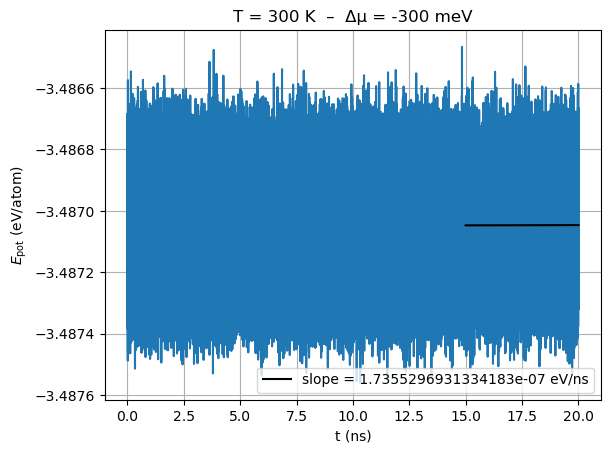

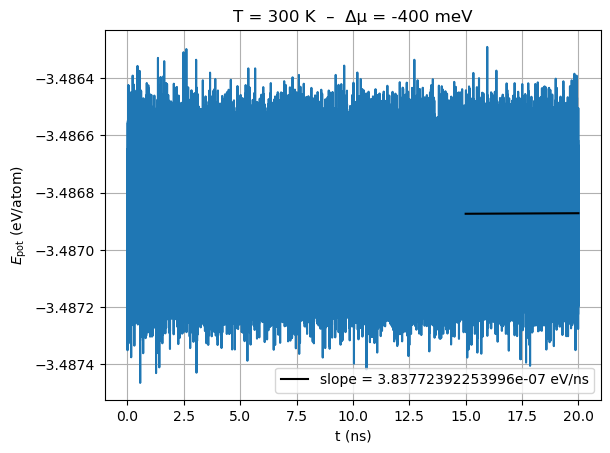

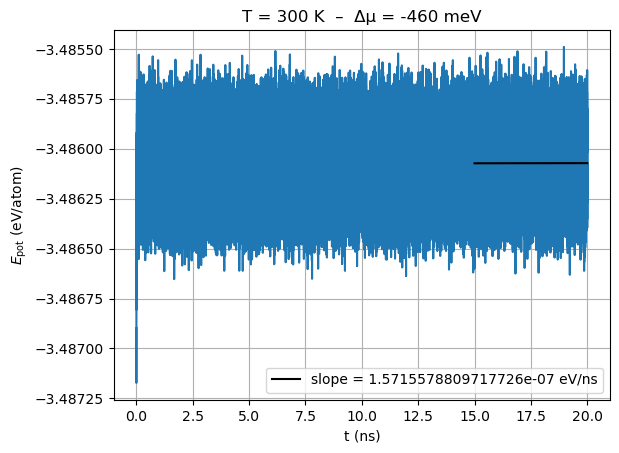

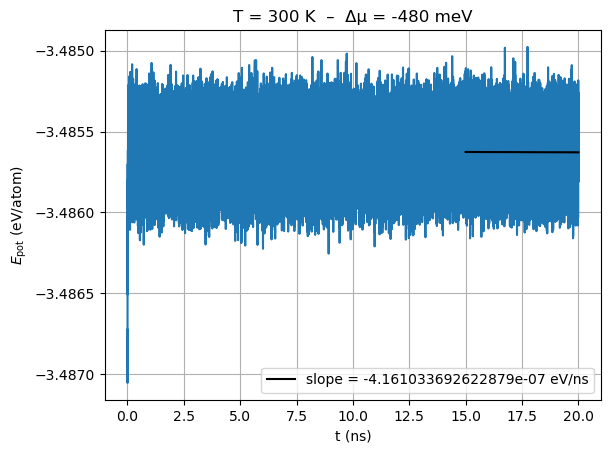

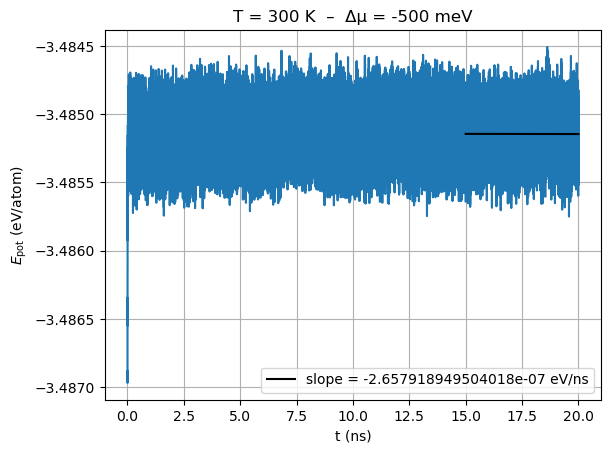

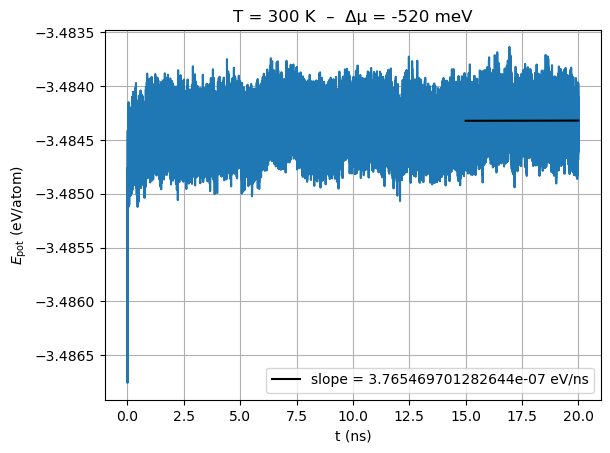

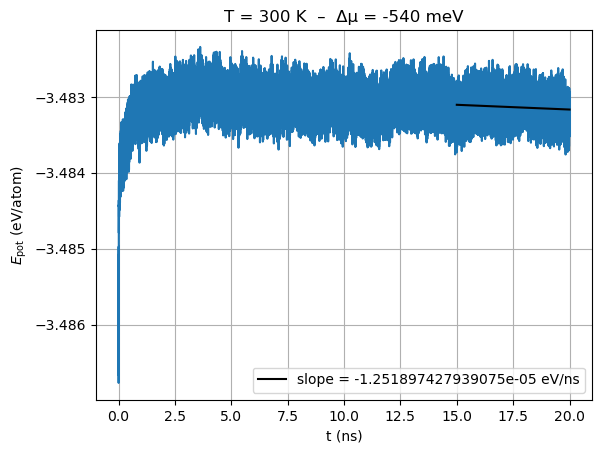

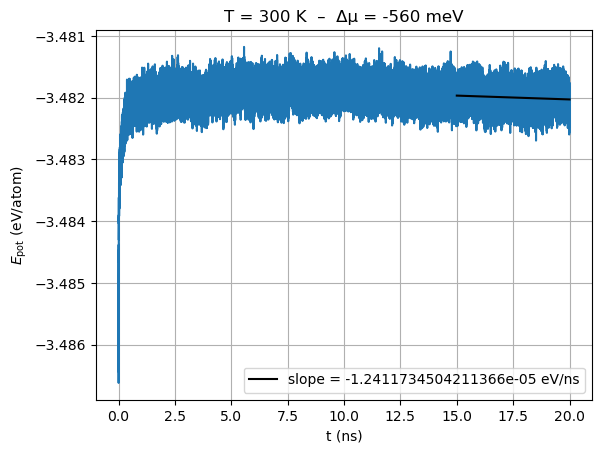

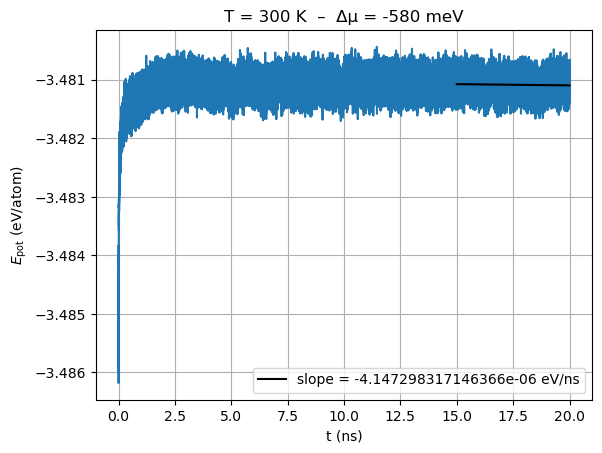

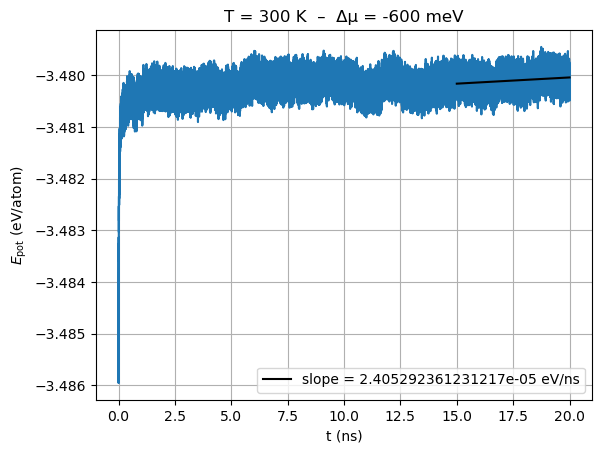

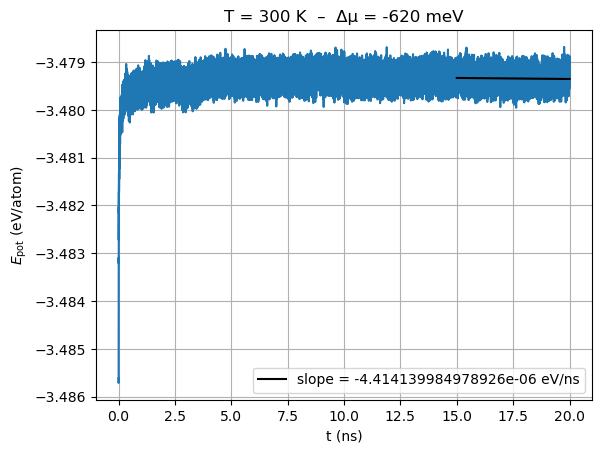

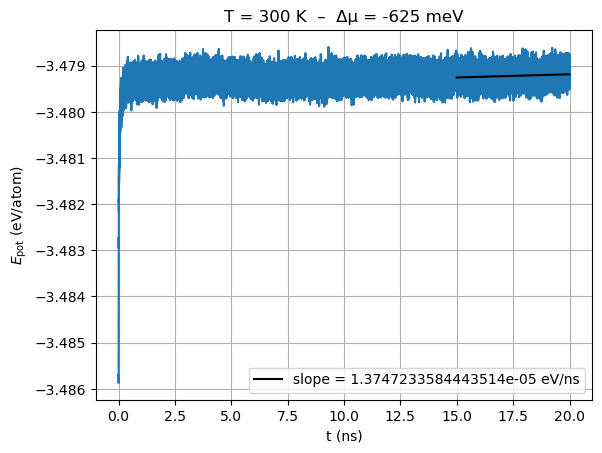

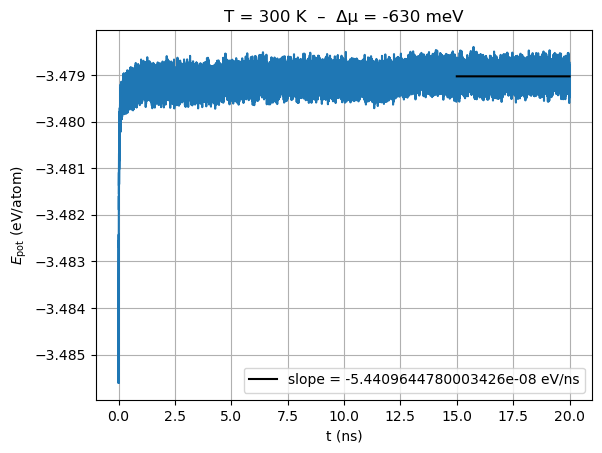

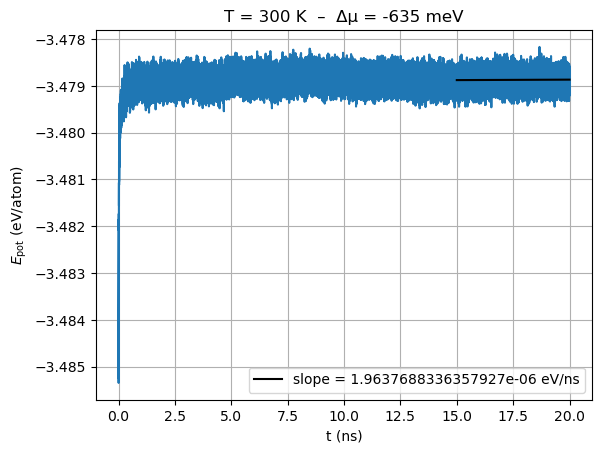

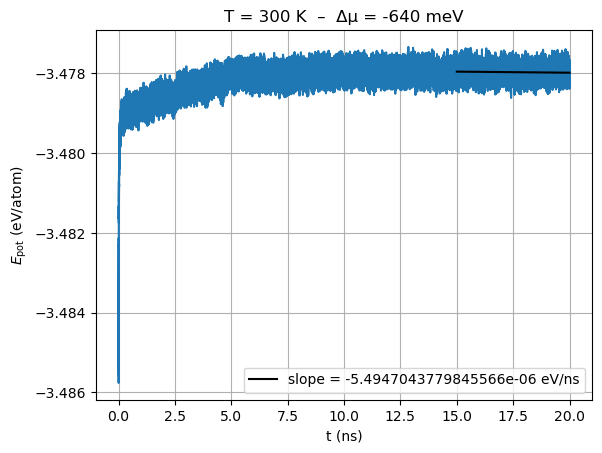

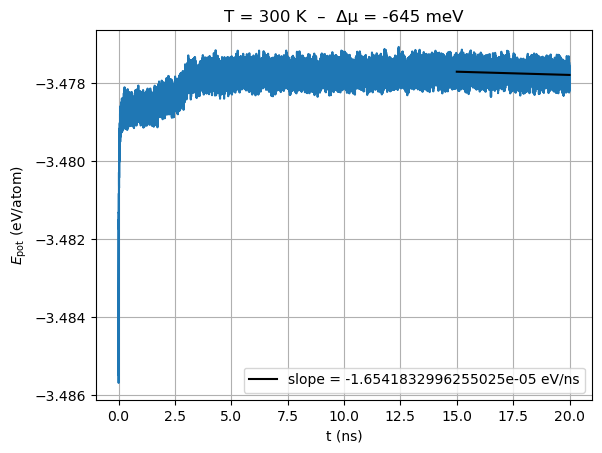

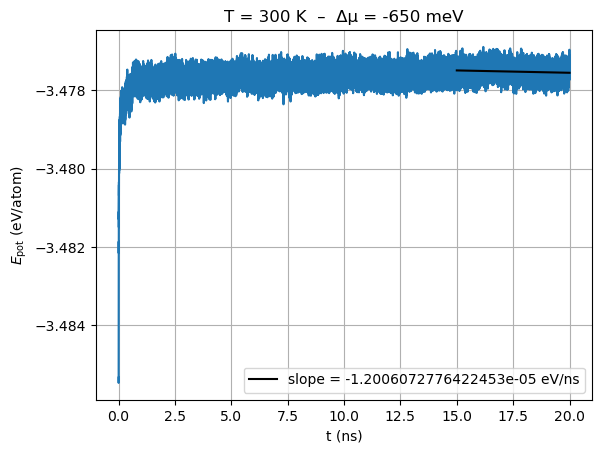

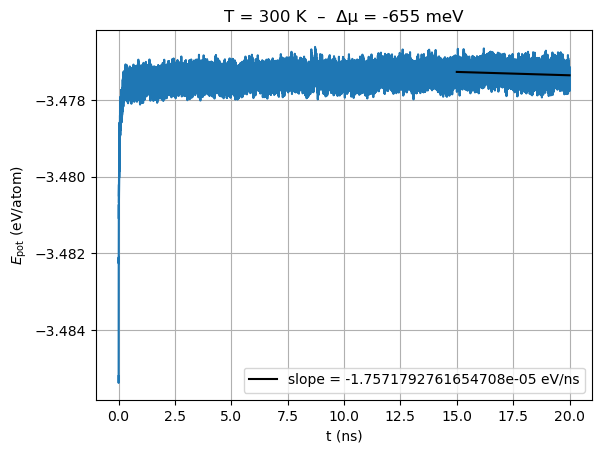

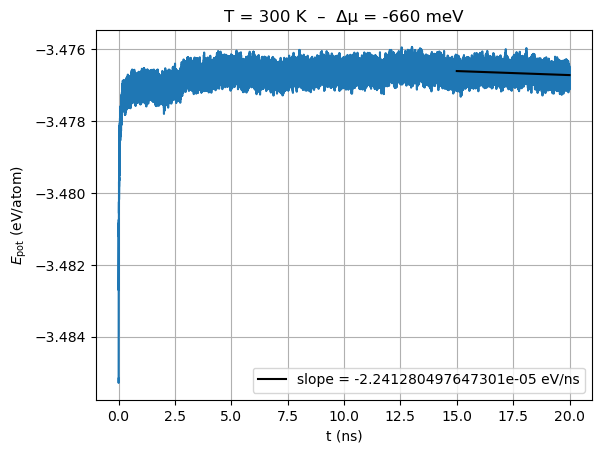

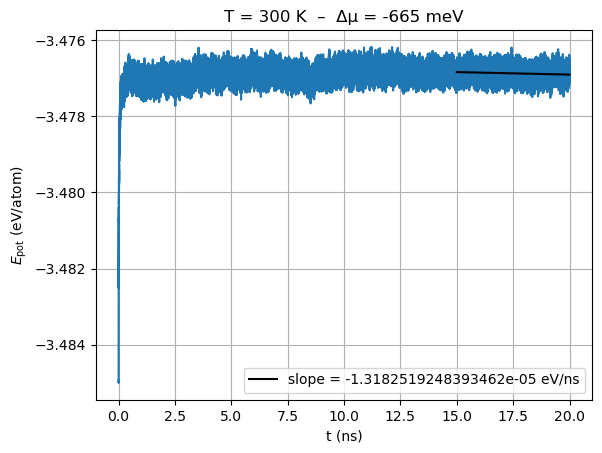

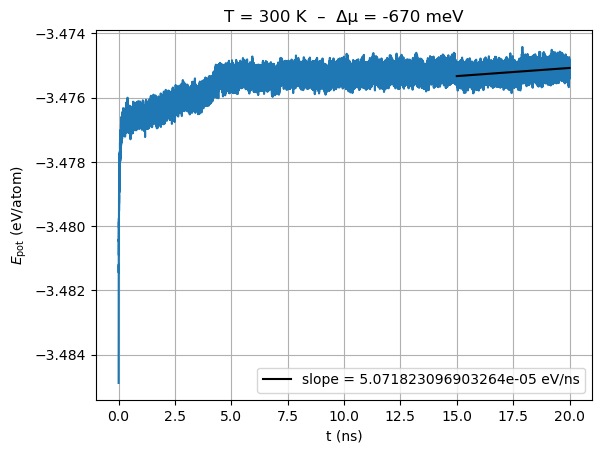

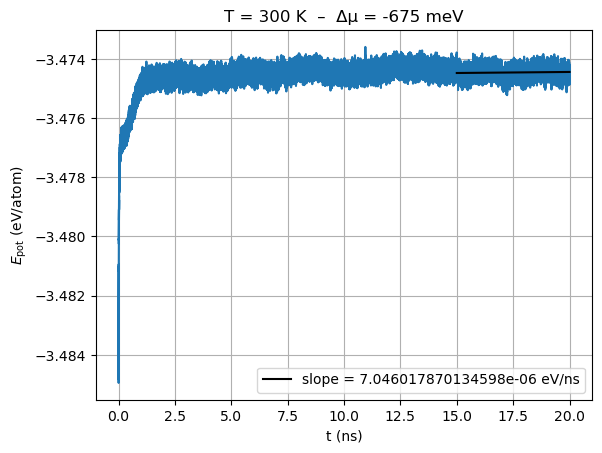

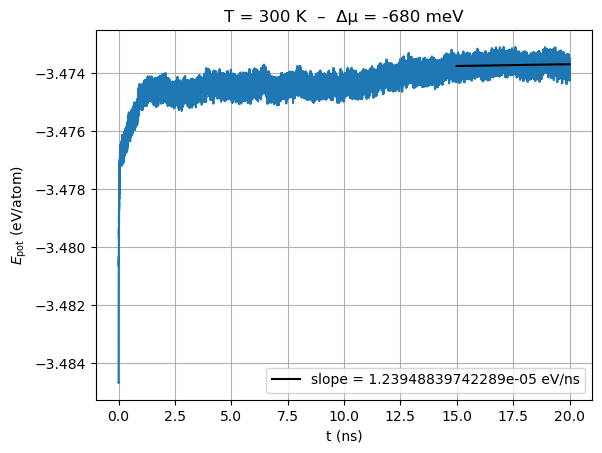

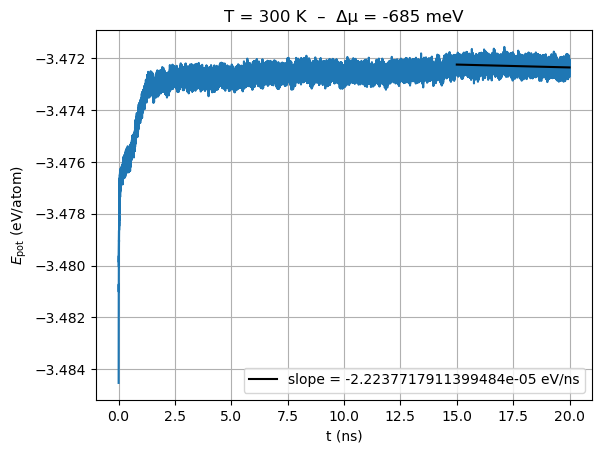

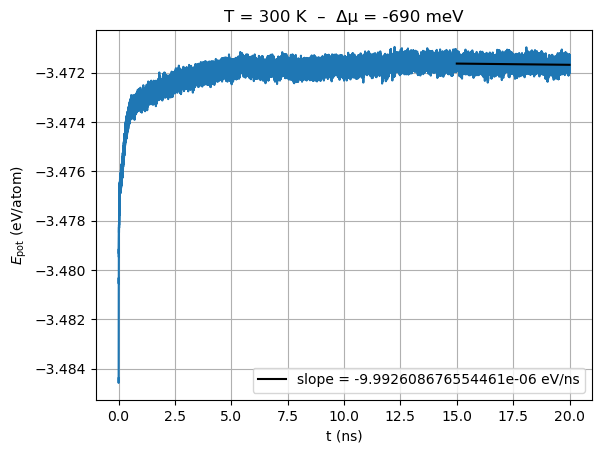

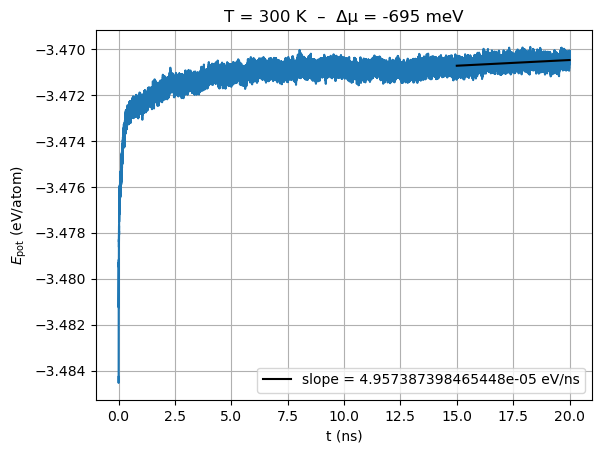

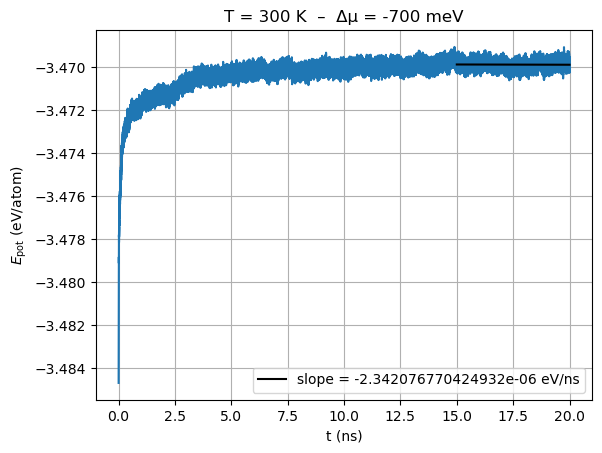

In [5]:
skip = 50 # skip the first n entries.
for dmu, d in data[300].items():
    # Fit.
    t = d["step"][skip:] * 2e-6
    E = d["Epot"][skip:]/d["N"][skip:]
    x = t[t > t[-1] - 5]
    y = E[t > t[-1] - 5]
    f = np.poly1d(np.polyfit(x, y, 1))
    # Plot.
    pyplot.figure(dpi=100)
    pyplot.title(f"T = 300 K  –  Δµ = {dmu} meV")
    pyplot.plot(t, E, "C0-")
    pyplot.plot(x, f(x), "k-", label=f"slope = {f[1]} eV/ns")
    pyplot.xlabel("t (ns)")
    pyplot.ylabel(r"$E_\mathrm{pot}$ (eV/atom)")
    pyplot.grid()
    pyplot.legend(loc="lower right")

/tmp/ipykernel_5072/231825920.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure(dpi=100)


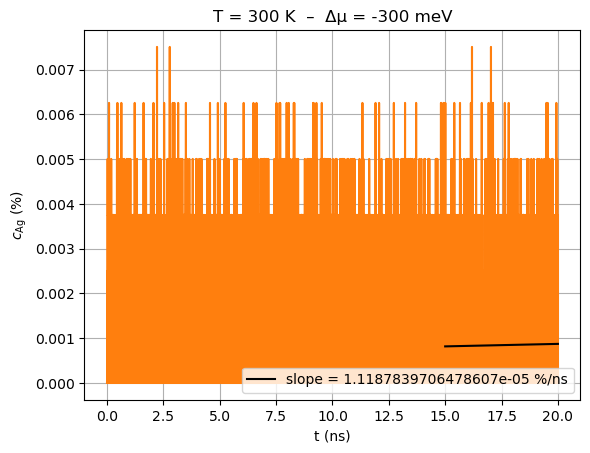

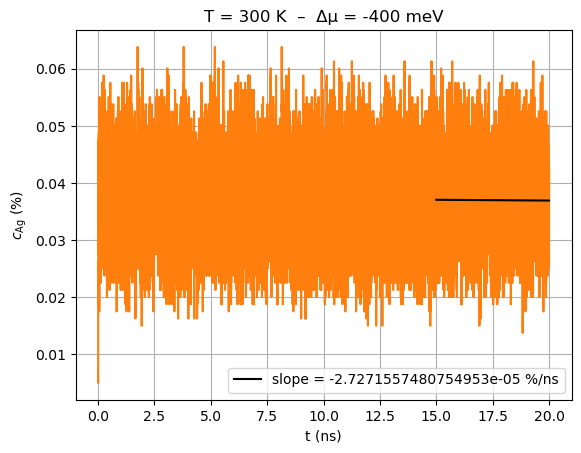

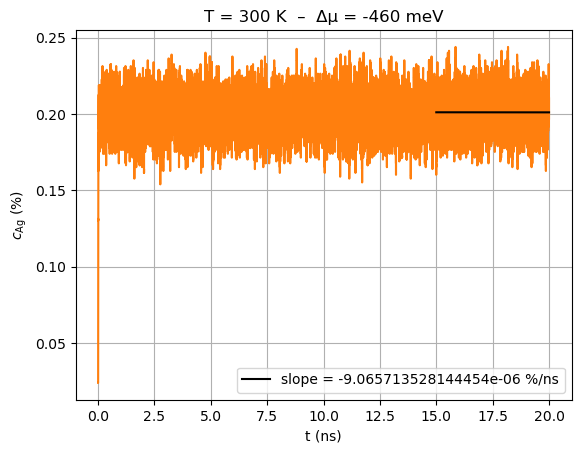

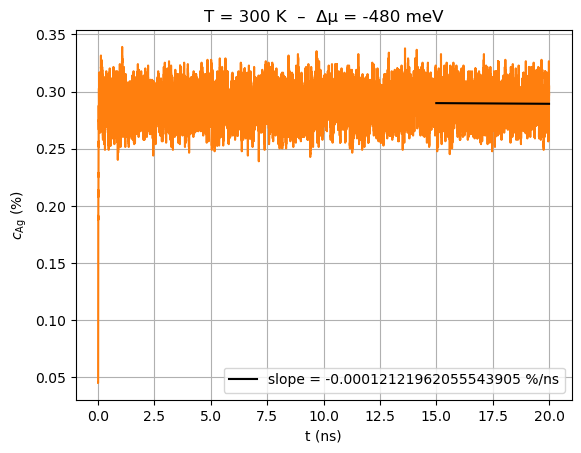

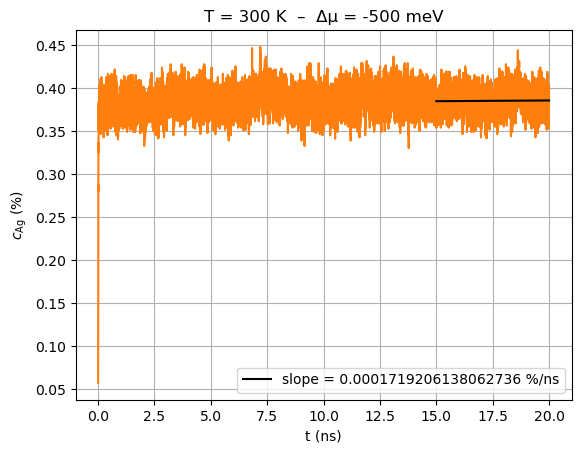

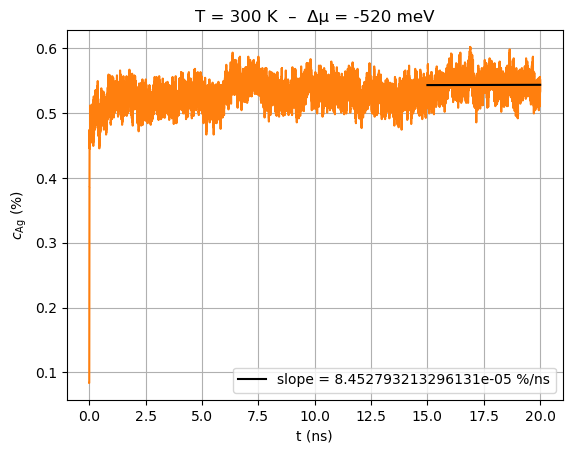

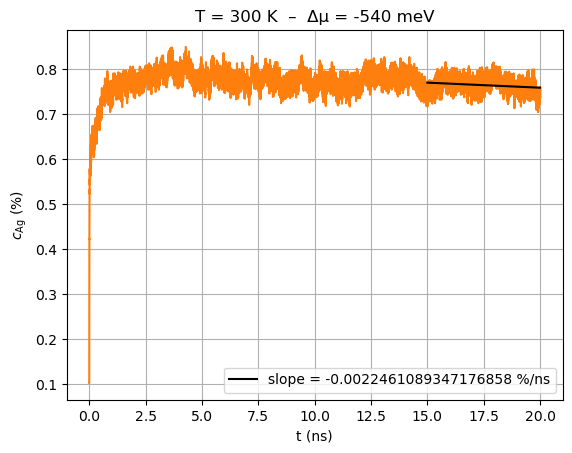

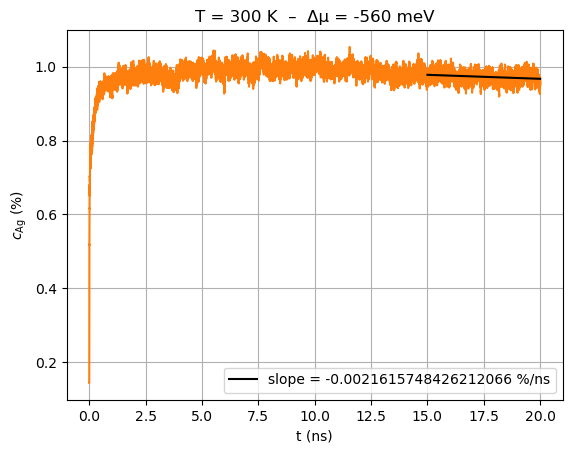

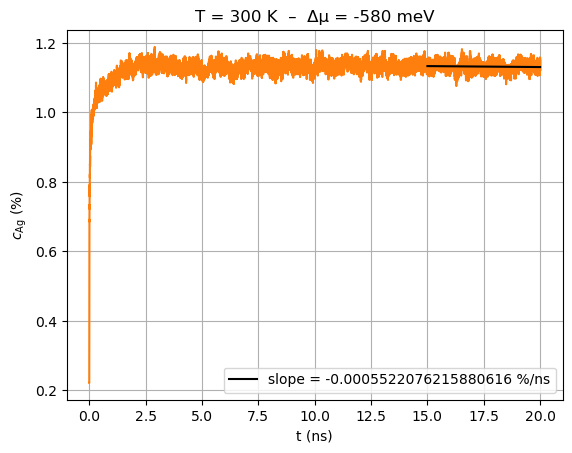

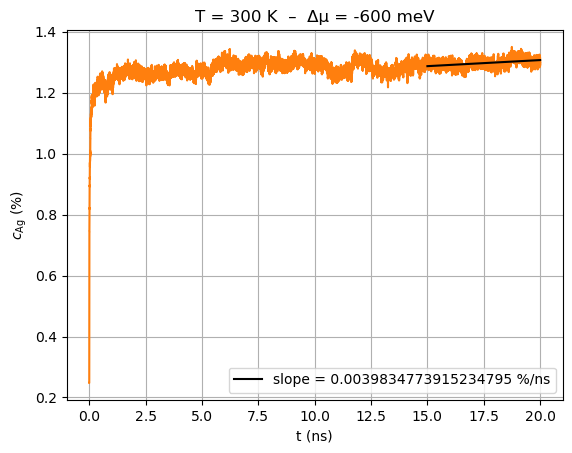

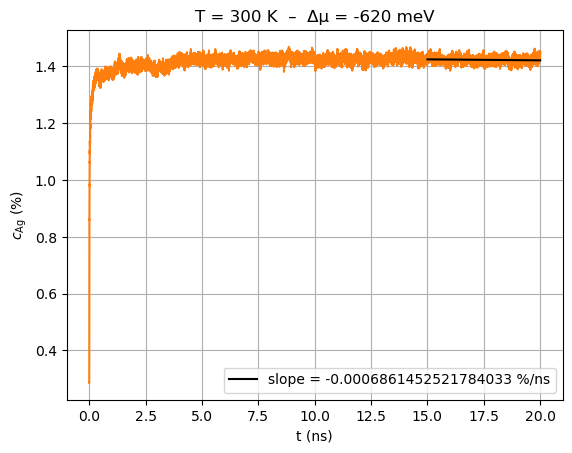

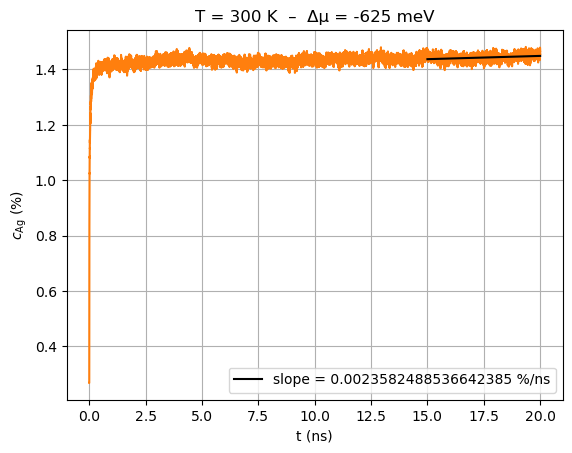

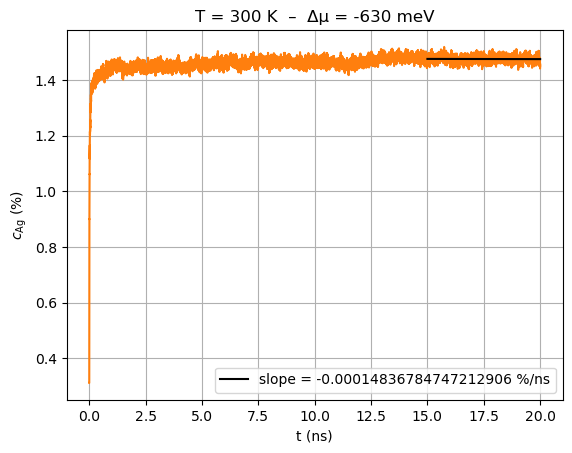

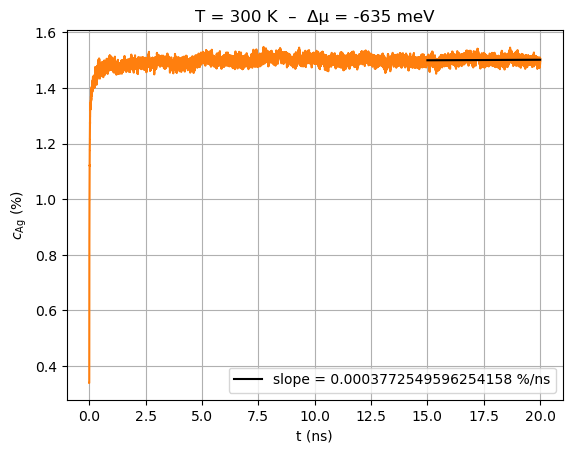

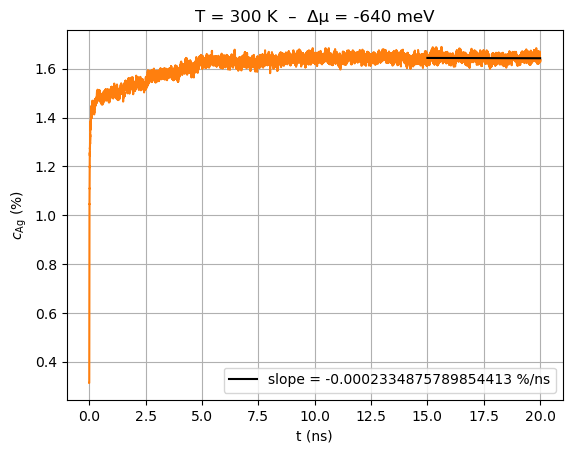

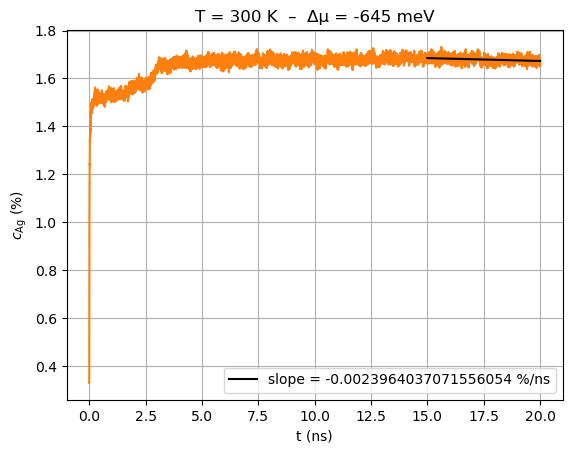

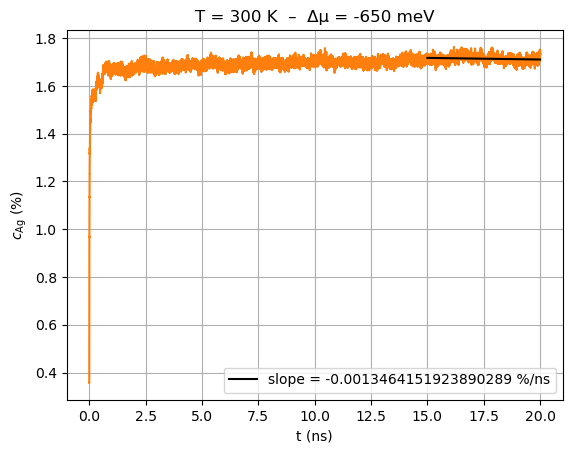

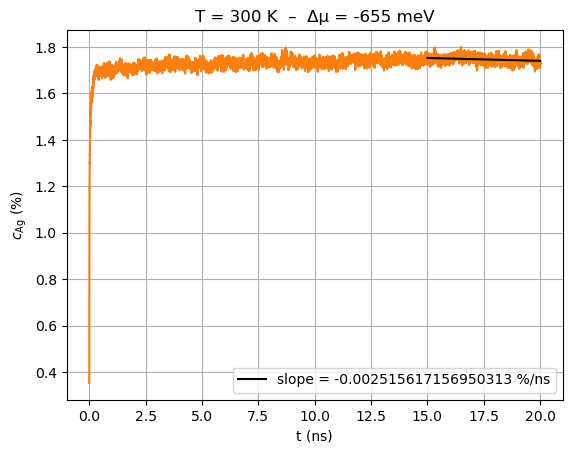

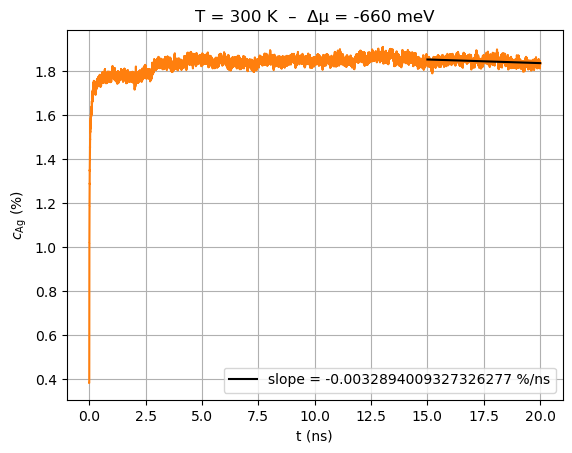

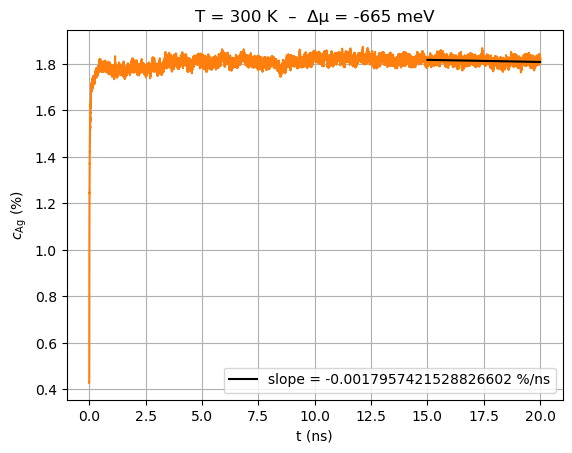

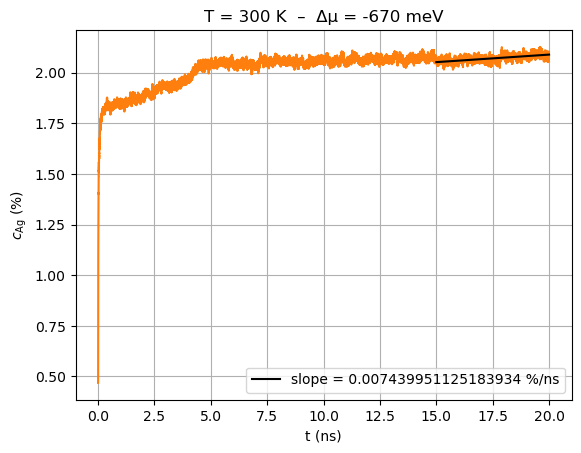

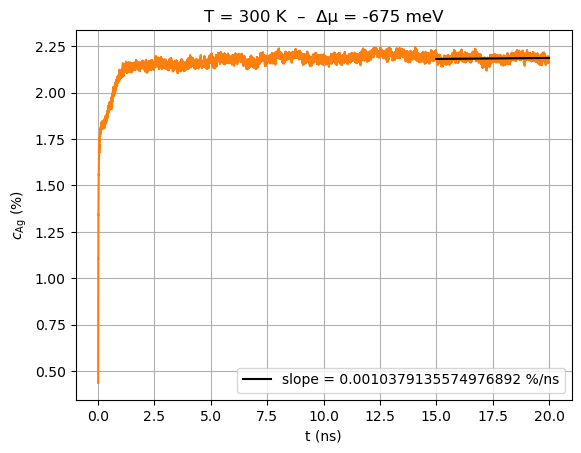

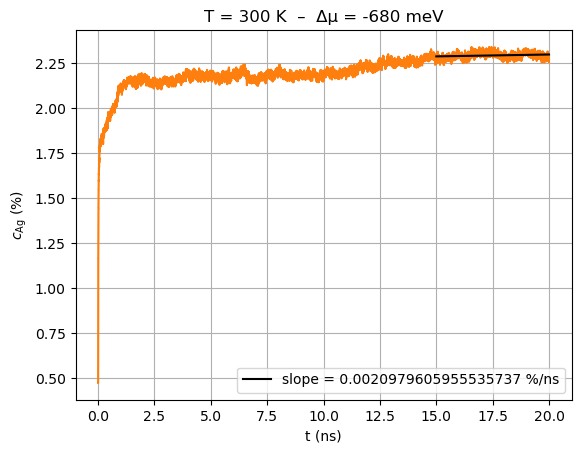

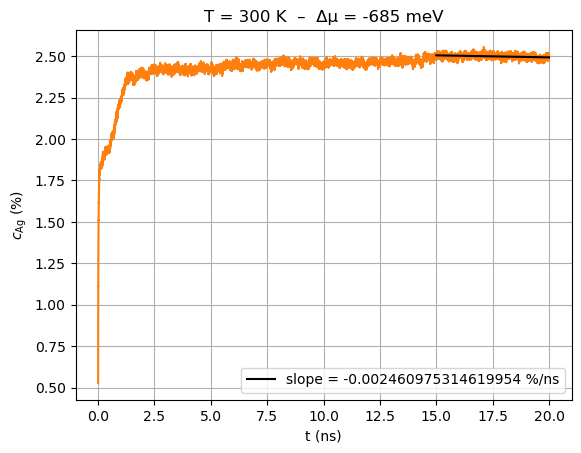

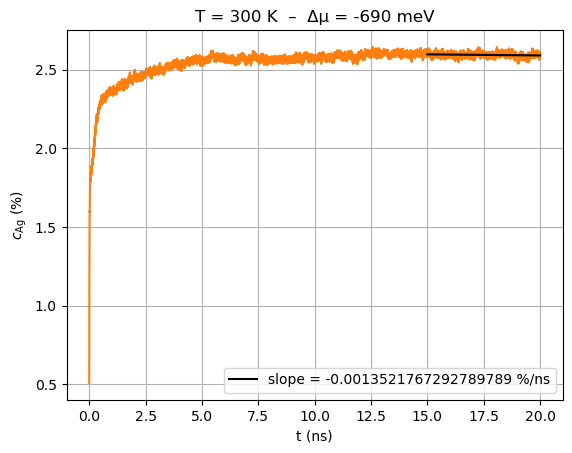

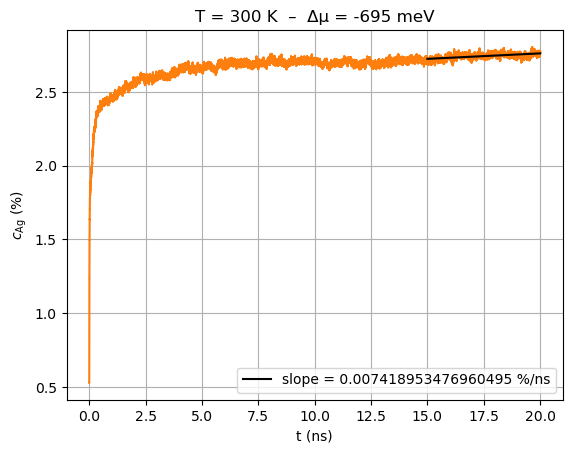

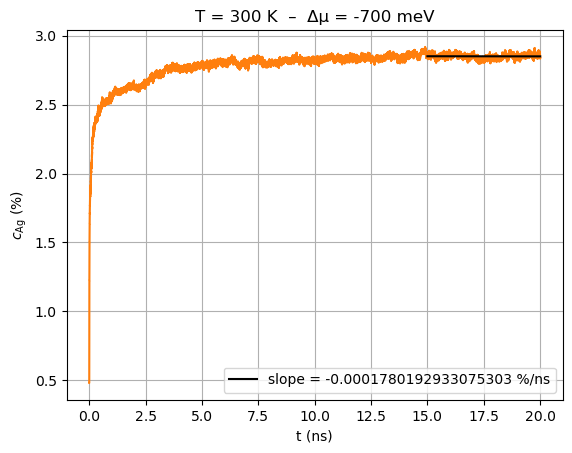

In [6]:
skip = 50 # skip the first n entries.
for dmu, d in data[300].items():
    # Fit.
    t = d["step"][skip:] * 2e-6
    c = d[f"c_{SEC_ELEM}"][skip:] * 100
    x = t[t > t[-1] - 5]
    y = c[t > t[-1] - 5]
    f = np.poly1d(np.polyfit(x, y, 1))
    # Plot.
    pyplot.figure(dpi=100)
    pyplot.title(f"T = 300 K  –  Δµ = {dmu} meV")
    pyplot.plot(t, c, "C1-")
    pyplot.plot(x, f(x), "k-", label=f"slope = {f[1]} %/ns")
    pyplot.xlabel("t (ns)")
    pyplot.ylabel(r"$c_\mathrm{" + SEC_ELEM + r"}$ (%)")
    pyplot.grid()
    pyplot.legend(loc="lower right")

/tmp/ipykernel_5072/887132648.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  pyplot.figure(dpi=100)


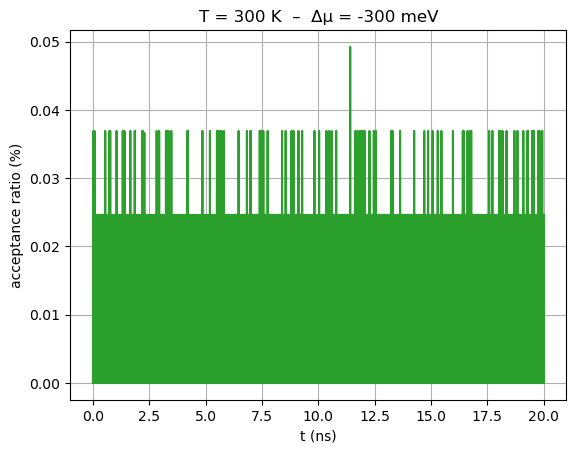

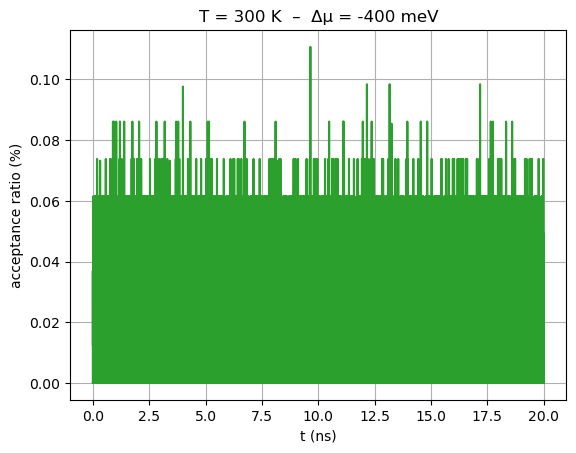

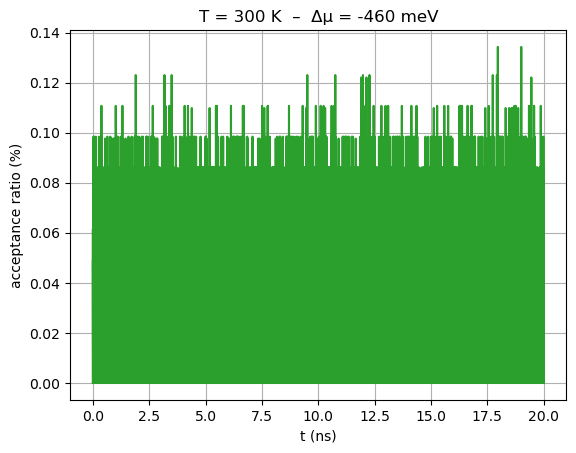

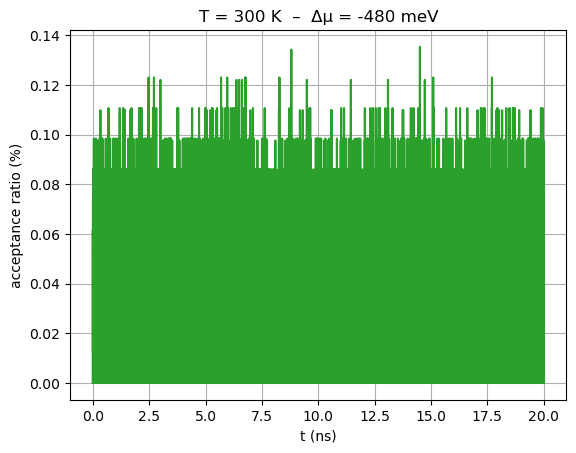

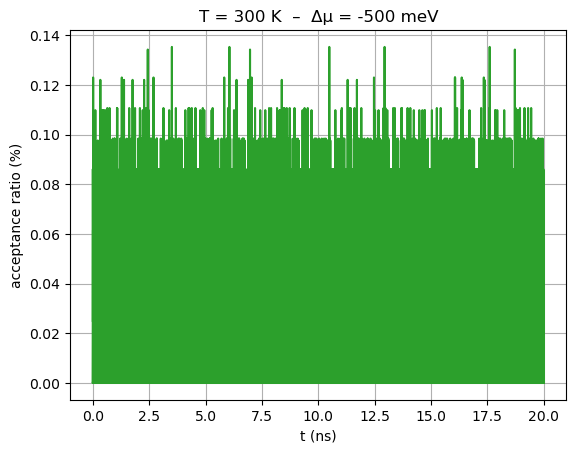

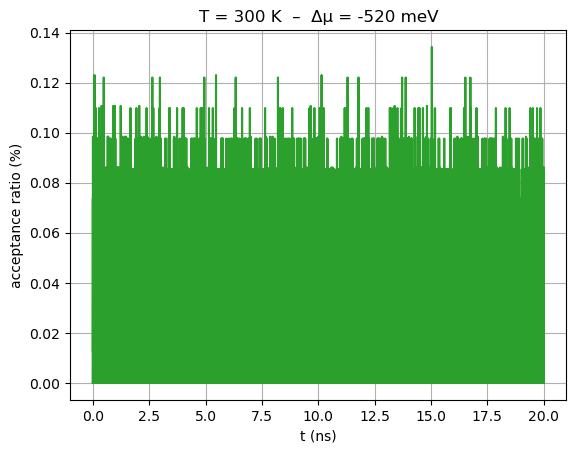

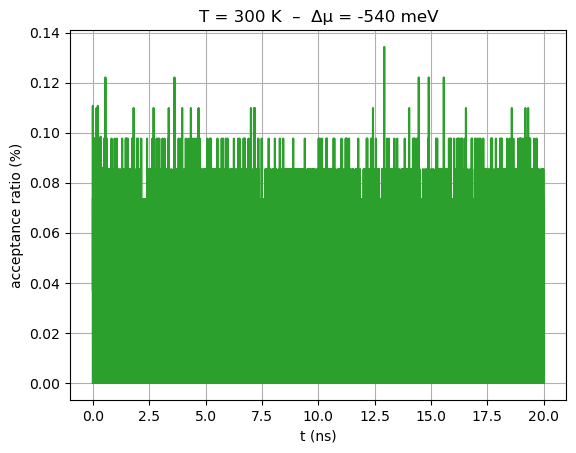

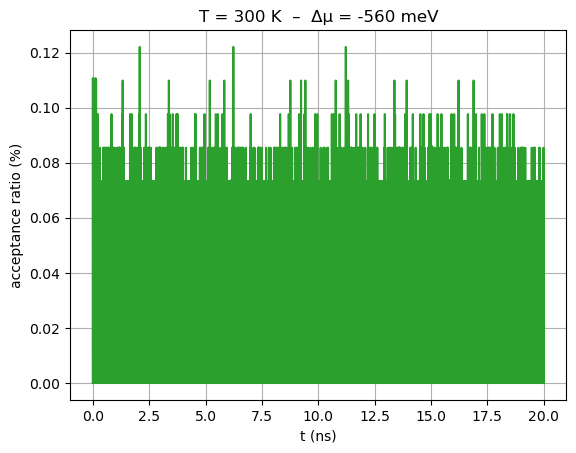

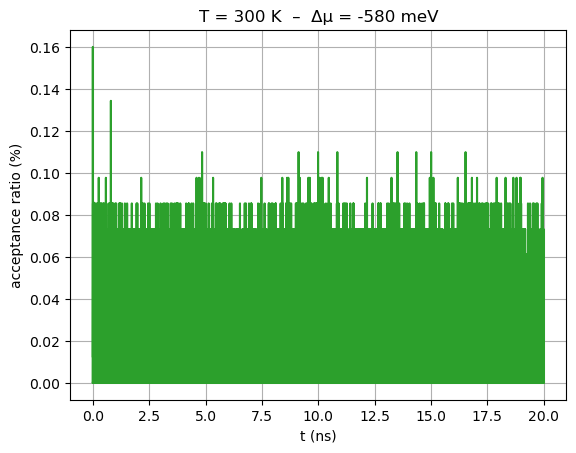

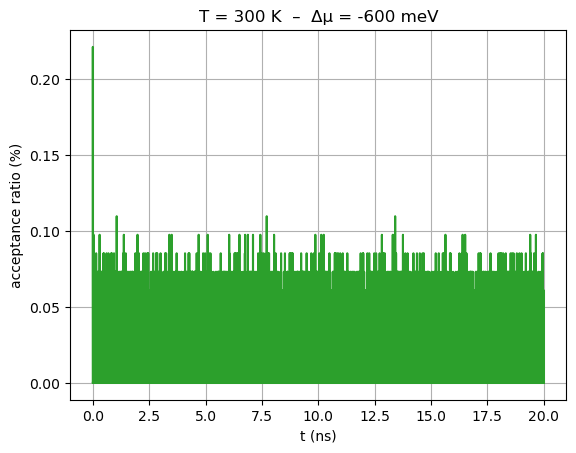

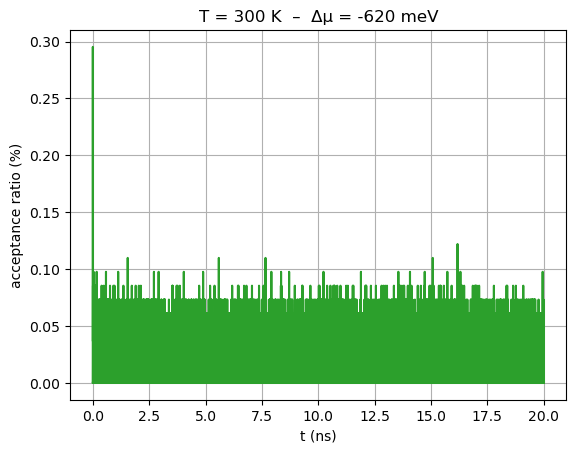

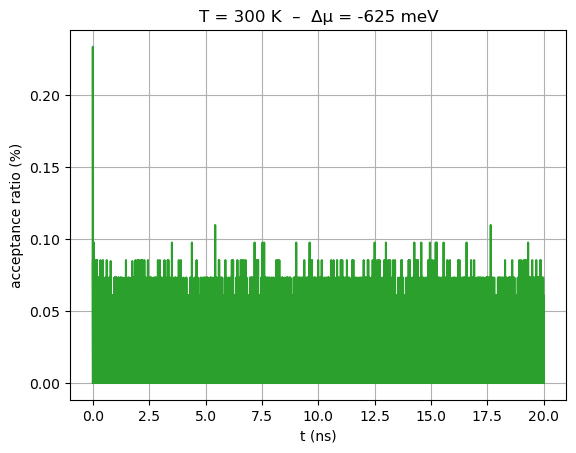

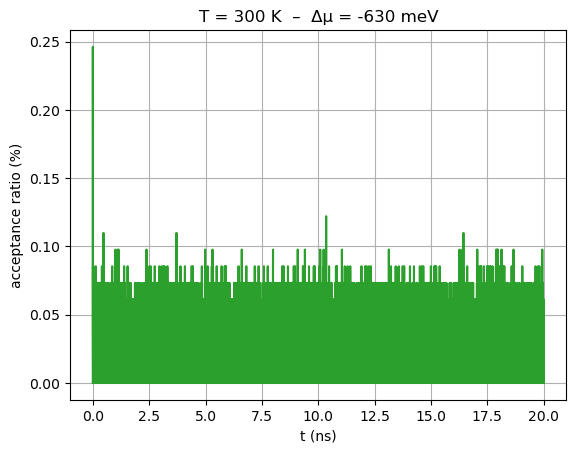

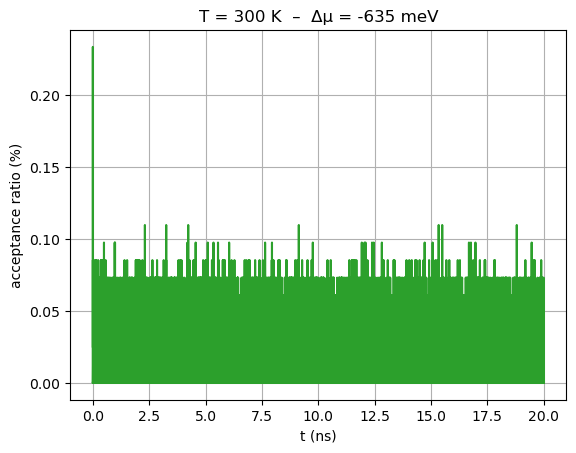

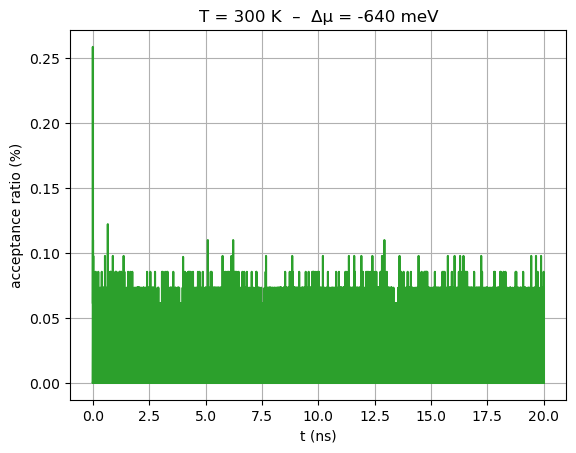

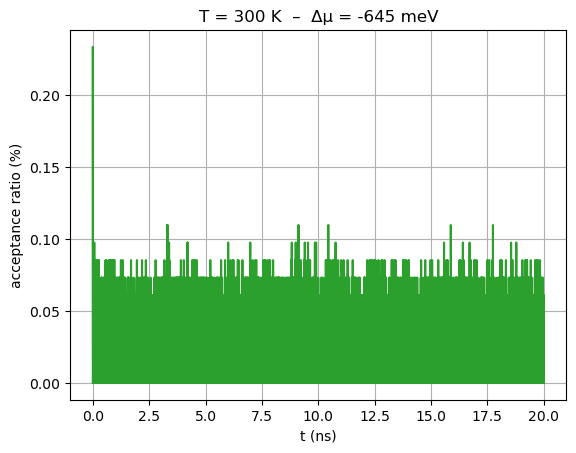

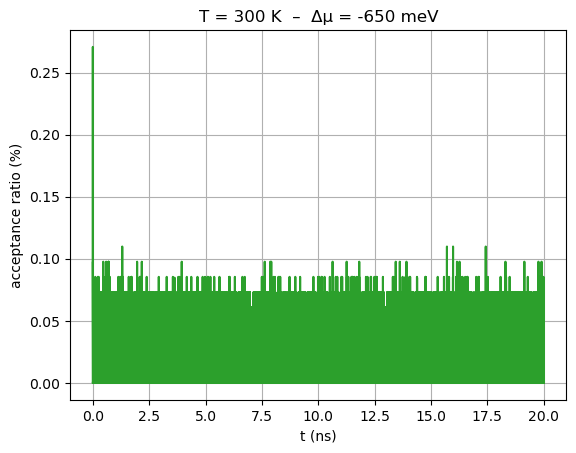

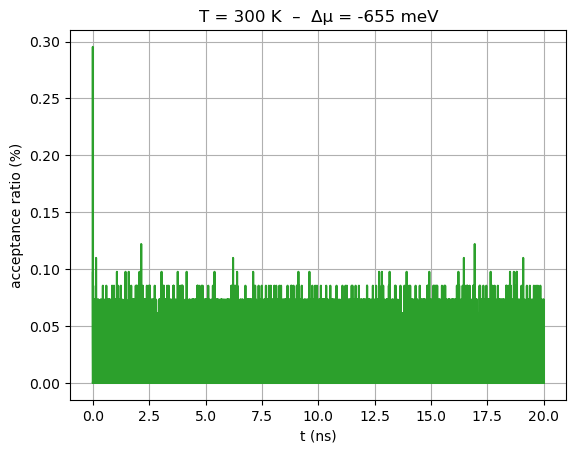

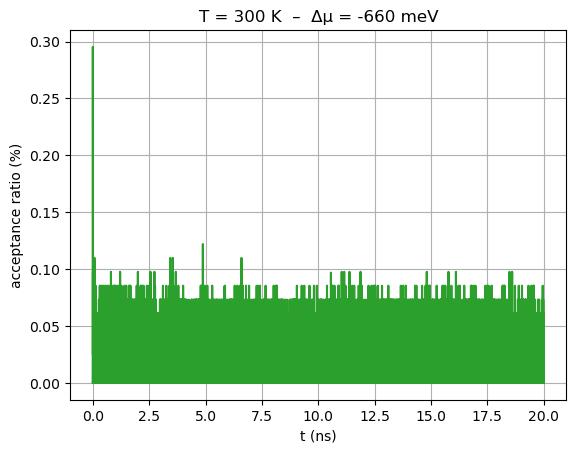

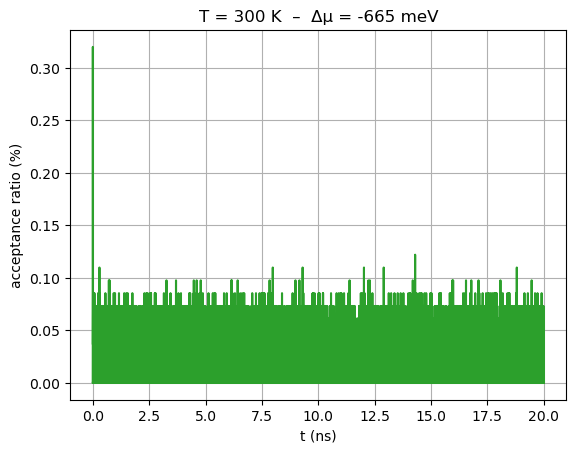

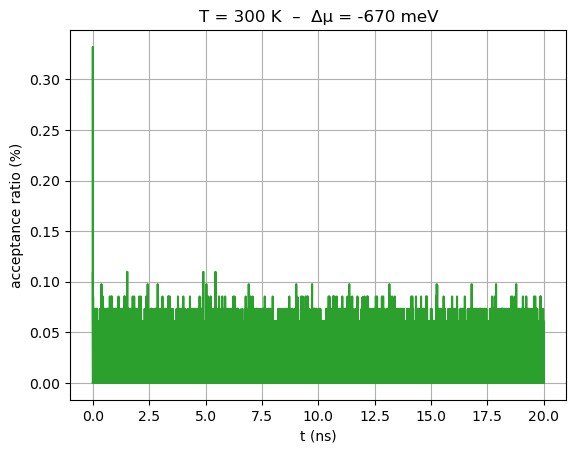

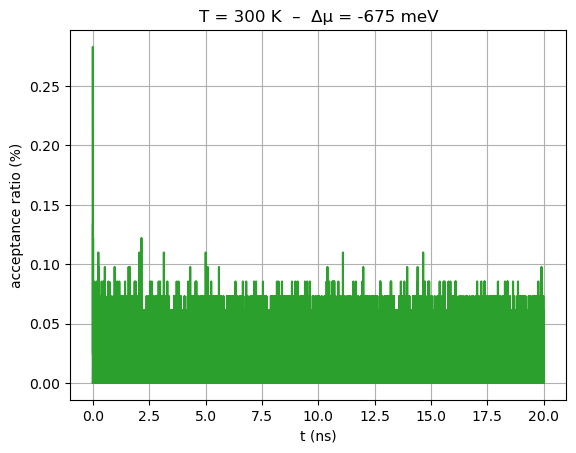

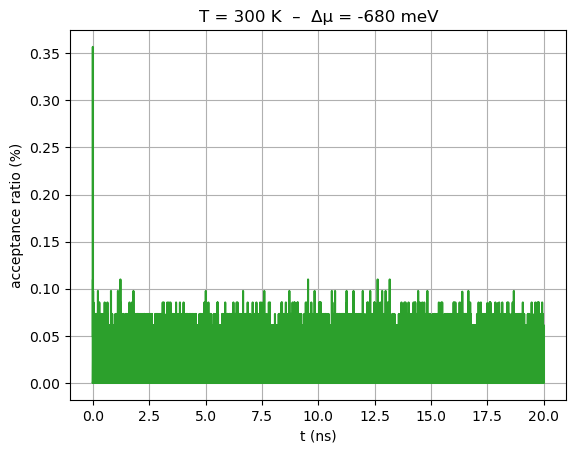

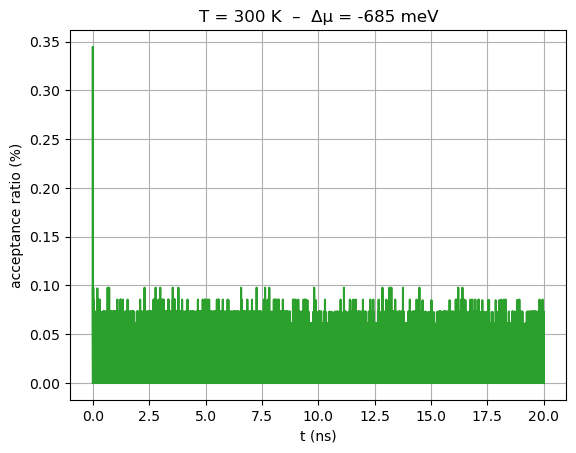

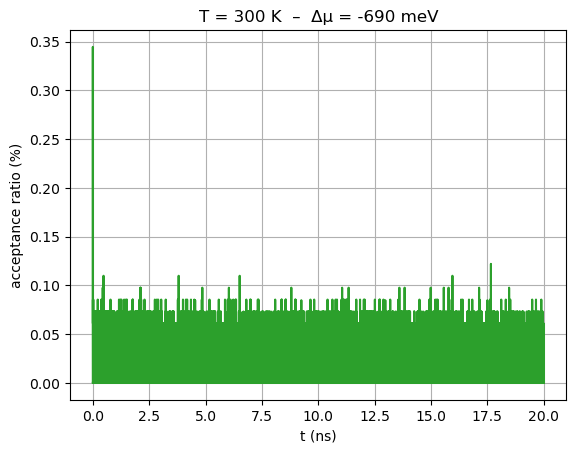

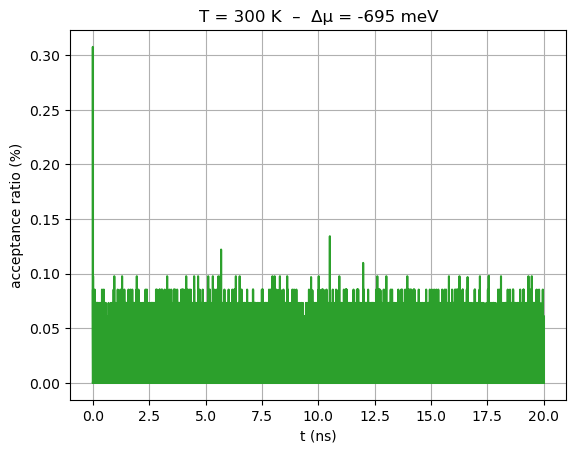

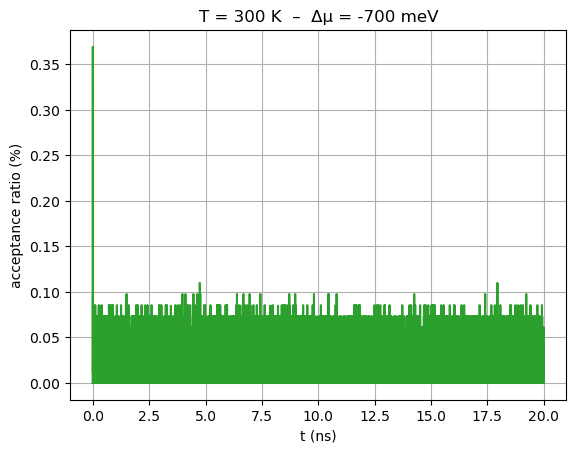

In [7]:
skip = 0 # skip the first n entries.
for dmu, d in data[300].items():
    pyplot.figure(dpi=100)
    pyplot.title(f"T = 300 K  –  Δµ = {dmu} meV")
    pyplot.plot(d["step"][skip:] * 2e-6, d["acceptance"][skip:] * 100, "C2-")
    pyplot.xlabel("t (ns)")
    pyplot.ylabel(r"acceptance ratio (%)")
    pyplot.grid()